In [708]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [709]:
#Read the data
bike_shares = pd.read_csv("C:\\Users\\Lokesh Gupta\\Documents\\Kavita\\upgrad\\linear_regression\\multiple_linear_regressinon\\day.csv")
bike_shares.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [710]:
bike_shares.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [711]:
bike_shares.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [712]:
#inspect the shape
bike_shares.shape

(730, 16)

In [713]:
#get overall information 
bike_shares.info()
#there are no null values ,so data cleaning/data impuation is not needed for NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [714]:
#get summary for numeric variables
bike_shares.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [715]:
#Remove the columns instant,dteday ,casual and registered, as these are insignificatant for the model
bike_shares = bike_shares.drop(['instant','dteday','casual','registered'],axis=1)

In [716]:
#check shape of dataframe after dropping
bike_shares.shape

(730, 12)

<Figure size 20000x100000 with 0 Axes>

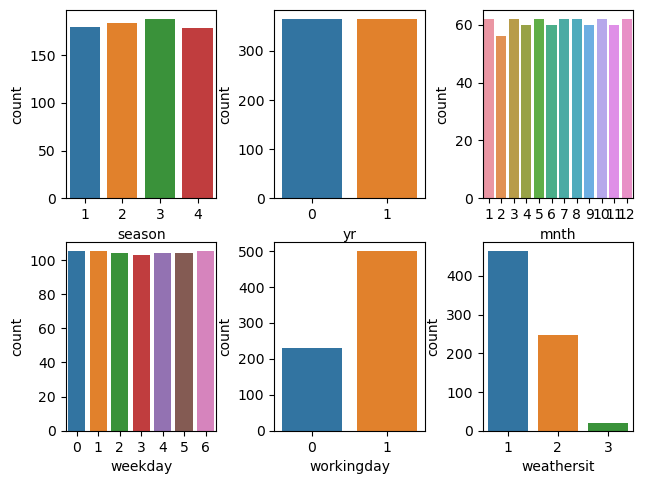

In [717]:
#Univariate Analysis for all the categorival  parameters- season,holiday,yr,mnth,weekday,workingday,weathersit
plt.figure(figsize=(200,1000))
fig,axes = plt.subplots(2,3 )
fig.tight_layout()
sns.countplot(data=bike_shares,x='season',ax=axes[0,0])
sns.countplot(data=bike_shares,x='yr',ax=axes[0,1])
sns.countplot(data=bike_shares,x='mnth',ax=axes[0,2])
sns.countplot(data=bike_shares,x='weekday',ax=axes[1,0])
sns.countplot(data=bike_shares,x='workingday',ax=axes[1,1])
sns.countplot(data=bike_shares,x='weathersit',ax=axes[1,2])
plt.show()
#distribution of all categories seems similar, just for weather 3, has lesser values and workingday = 0, ie, holiday has lesser count

<Figure size 1000x1000 with 0 Axes>

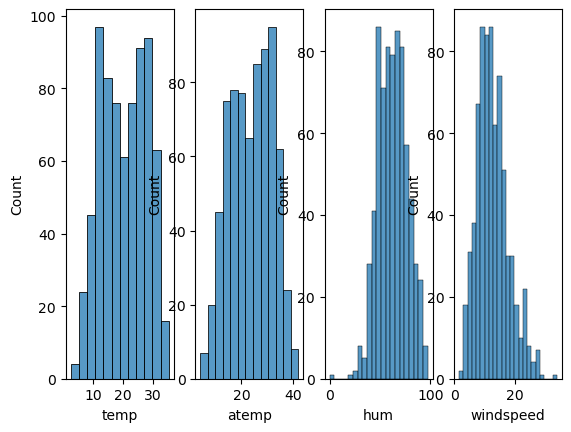

In [718]:
#univariate analysis for numerica variables using histplots
plt.figure(figsize=(10,10))
figure,axes = plt.subplots(1,4)
sns.histplot(data=bike_shares,x='temp',ax=axes[0])
sns.histplot(data=bike_shares,x='atemp',ax=axes[1])
sns.histplot(data=bike_shares,x='hum',ax=axes[2])
sns.histplot(data=bike_shares,x='windspeed',ax=axes[3])
plt.show()
#humidity and windspeed seems to have uniform distribution

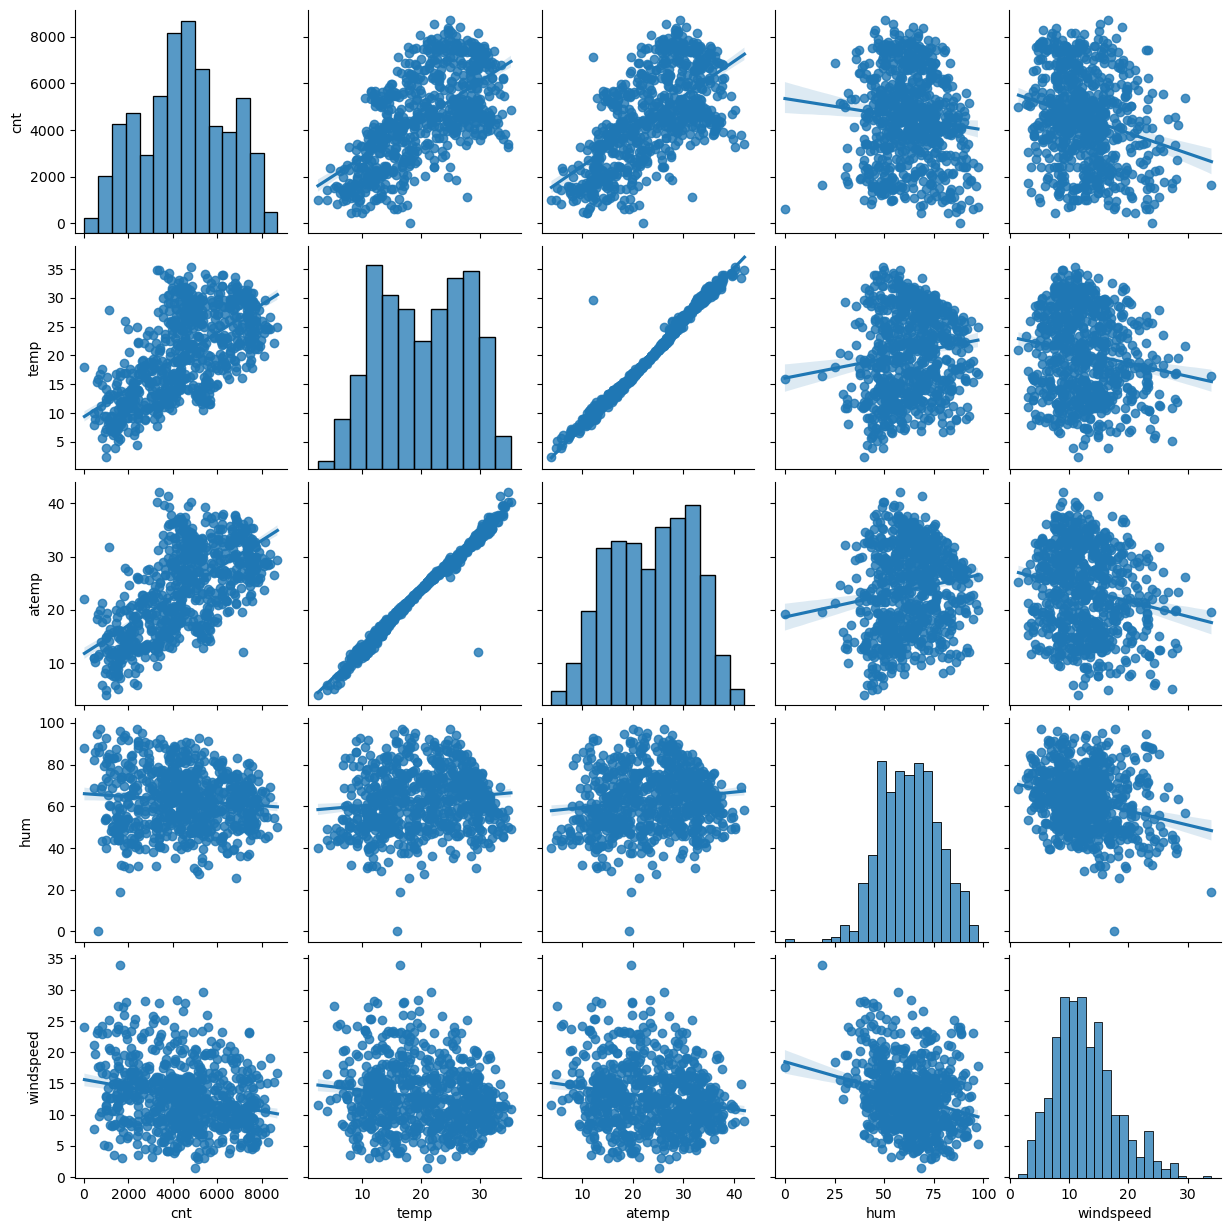

In [719]:
#Bivariate analysis for numerical variables
#Visualize all numerical variables using pairplot
sns.pairplot(bike_shares,vars=['cnt','temp','atemp','hum','windspeed'],kind="reg")
plt.show()
#variable temp and atemp seems to have linear relationship with cnt, as compared to humidity and windspeed

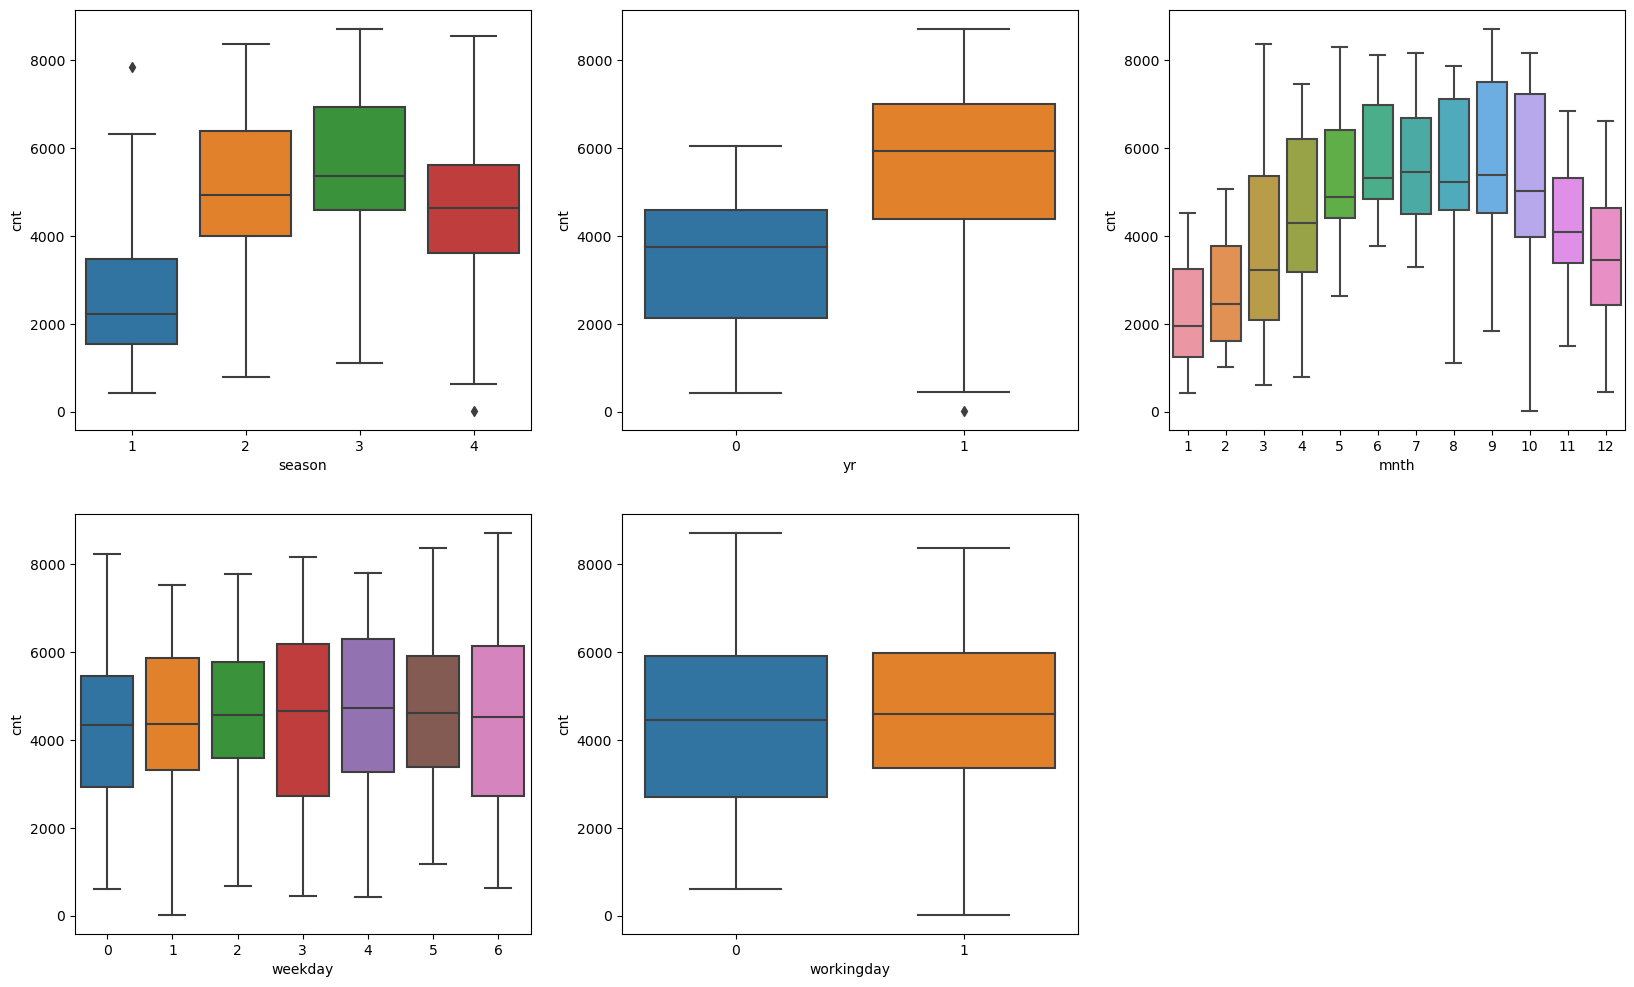

In [720]:
#Bivariate Analysis
#Visualize all categorical variables using box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_shares)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_shares)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_shares)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_shares)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_shares)
plt.show()
#means of season and month and year are more distributed as compared to others

In [721]:
#season is categorical values, though its mapped to numerics. convert those numeric to approraite categories
varlist=['season']
bike_shares[varlist] = bike_shares[varlist].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [722]:
#check values for season column after mapping 
bike_shares['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [723]:
#check data again after mapping
bike_shares.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [724]:
#we need to convert the categorical values into proper numeric values for linear regression model
# season has 4 values, which we need to convert to actual string and then numeric
#yr has just 2 values which is already mapped to 0 and 1, so nothing is needed here
#mnth has 12 values, we need to first encode them to numeric values of 0 and 1
#weakday has 6 values. we need to first encode them to numeric values of 0 and 1
#weathersit has 4 values, so we need to convert to actual string and then numeric

In [725]:
#season has 4 levels, for building linear model, we need to convert into numeric .
#create dummy variables
all_seasons = pd.get_dummies(bike_shares['season'])
all_seasons

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [726]:
#we dont need 4 columns, we can drop the column fall
all_seasons = pd.get_dummies(bike_shares['season'],drop_first=True)
all_seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [727]:
#add the result to original dataset
bike_shares = pd.concat([bike_shares,all_seasons],axis=1)

In [728]:
#lets see data now
bike_shares.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [729]:
#now  drop season as we have created dummies for season
bike_shares.drop(['season'],axis = 1,inplace = True)

In [730]:
#check data again
bike_shares.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [731]:
#create dummies for month, weekdays and weathersit
bike_shares=pd.get_dummies(bike_shares,columns=['mnth','weekday','weathersit'],drop_first=True,prefix=['mnth','weekday','weathersit'])


In [732]:
#check data after creation of dummies, we could see mnth_2 to mnth_12 created for months and weekday_1 to weekday_6 created for weakday
# and weatersit_2 and weathersit_3 created for weather, since we have values just for 3 weathers in dataset
bike_shares.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [733]:
bike_shares.mnth_11.value_counts()

0    670
1     60
Name: mnth_11, dtype: int64

In [734]:
bike_shares.mnth_2.value_counts()

0    674
1     56
Name: mnth_2, dtype: int64

In [735]:
bike_shares.weekday_3.value_counts()

0    627
1    103
Name: weekday_3, dtype: int64

In [736]:
#check all columns
bike_shares.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

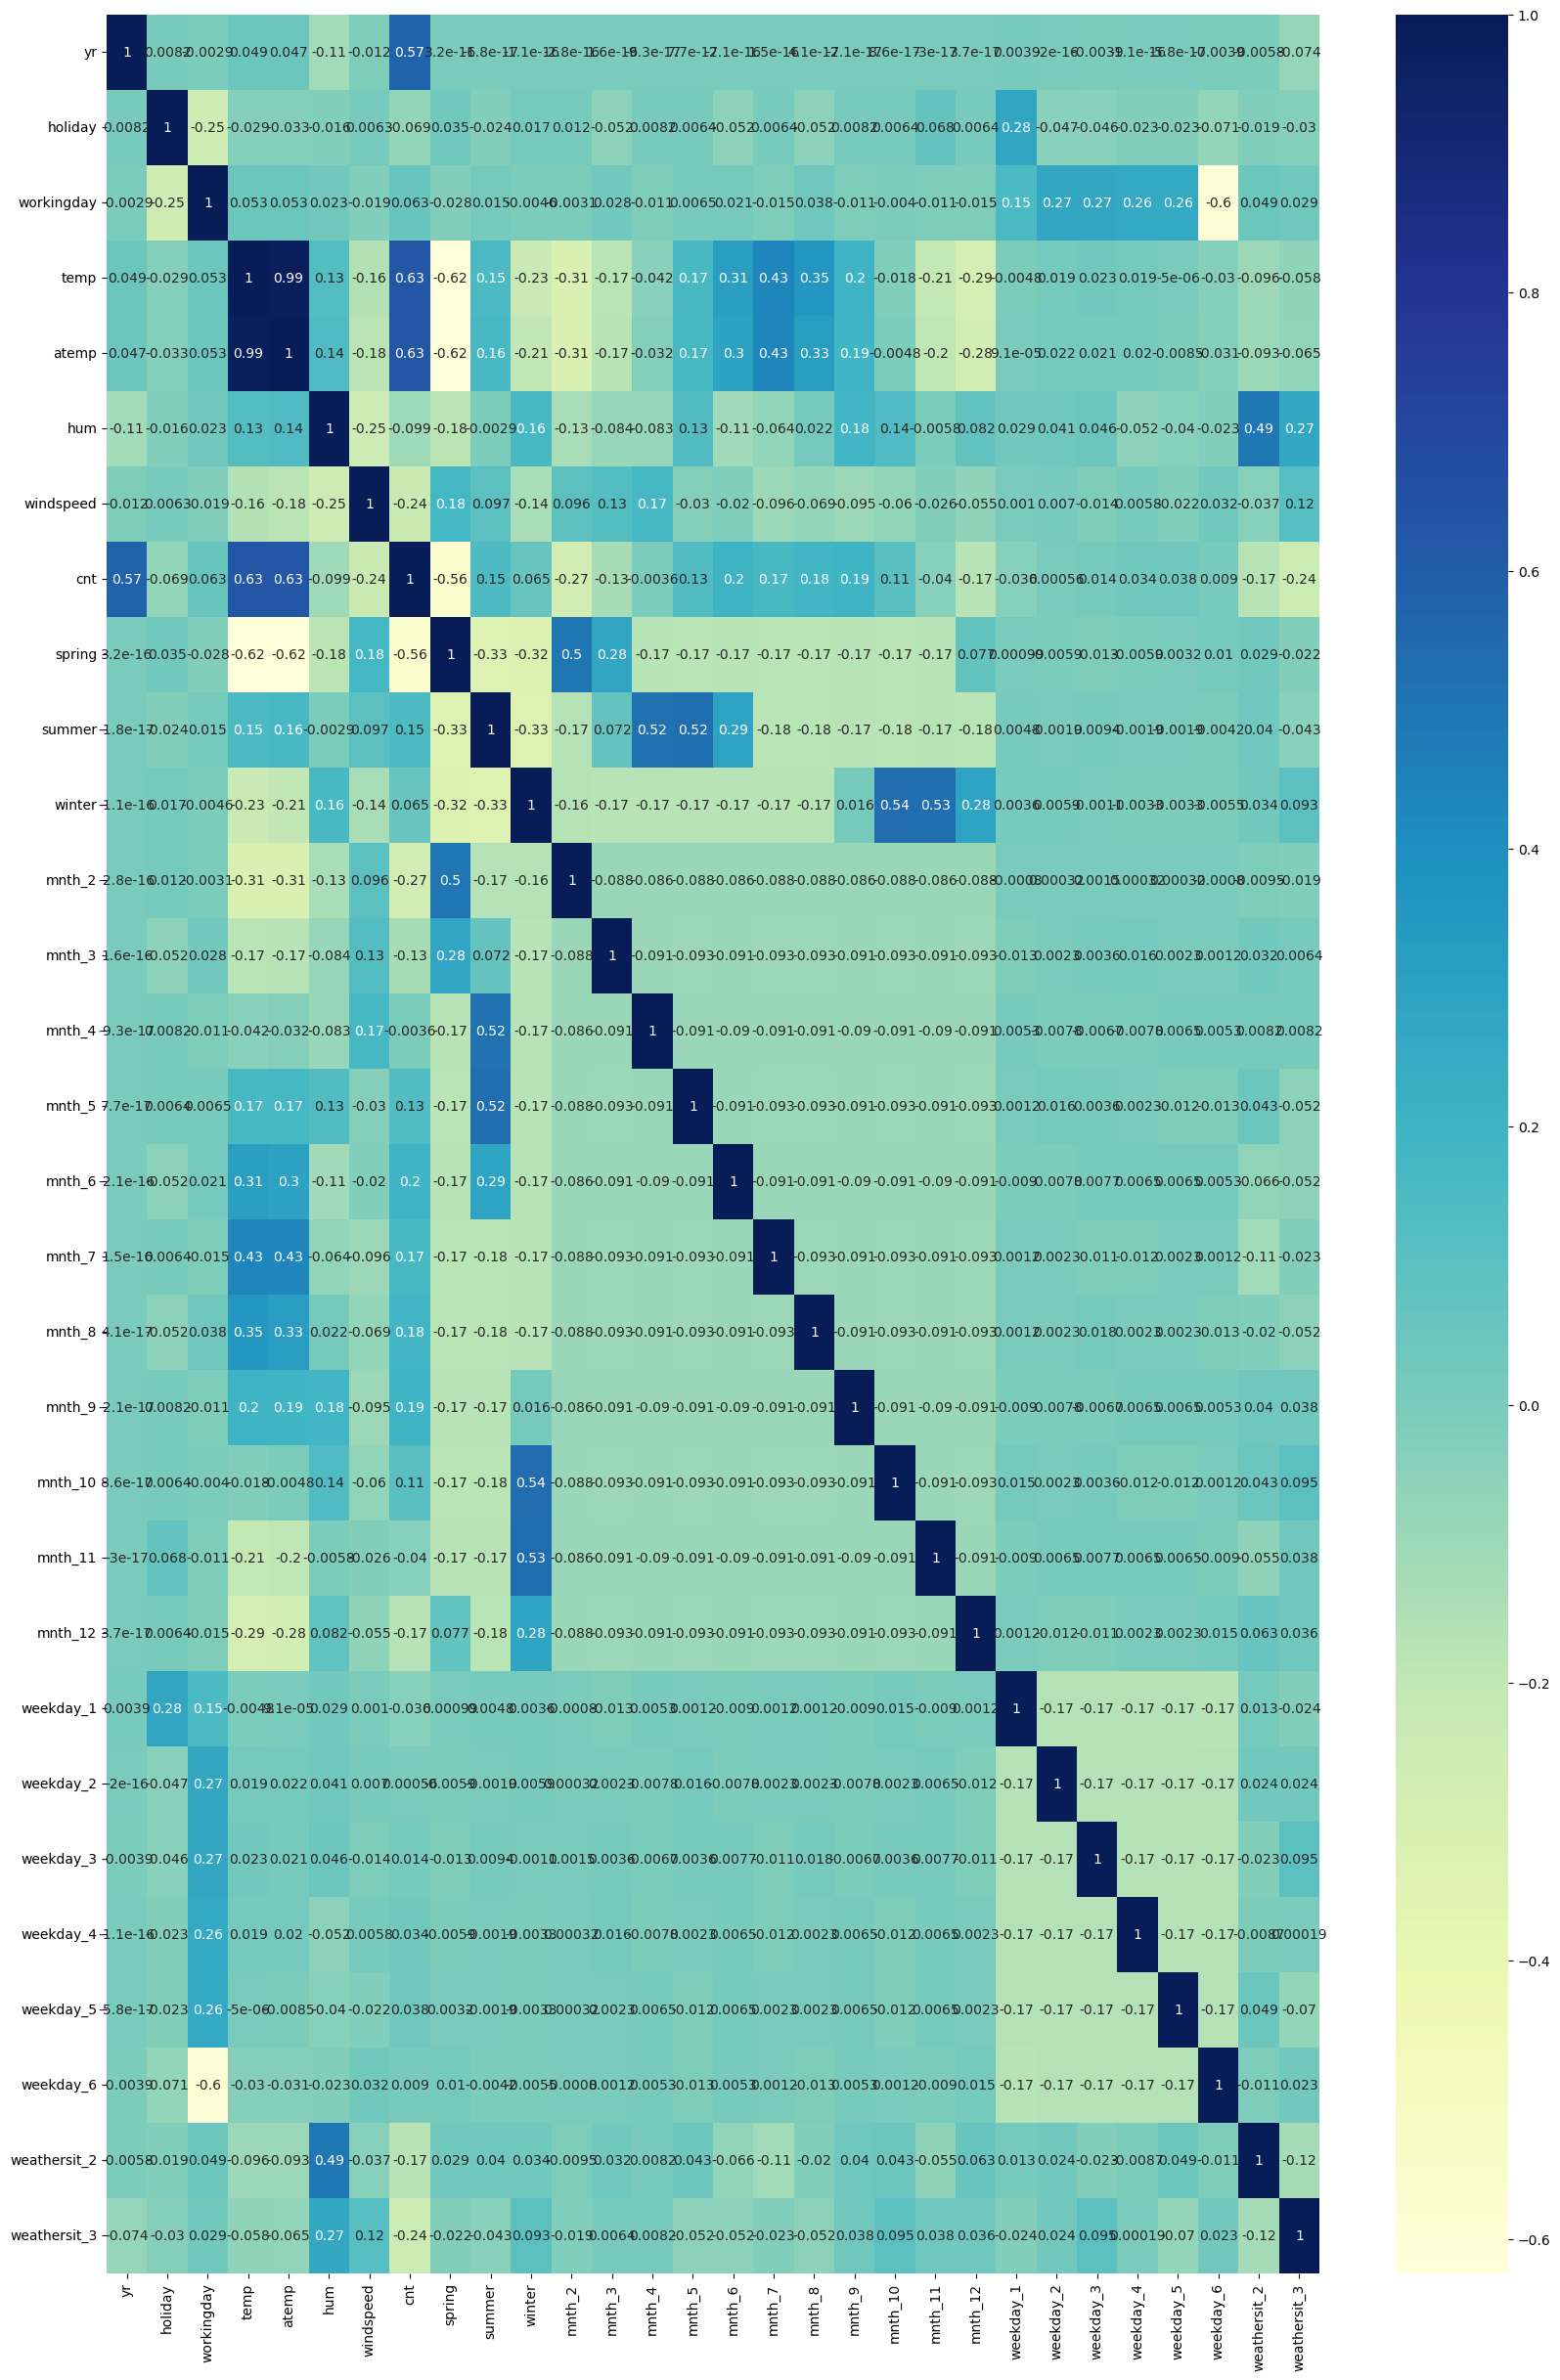

In [737]:
#heatmap - to check correlation between variables
plt.figure(figsize = (20,30))
sns.heatmap(bike_shares.corr(),annot=True,cmap="YlGnBu")
plt.show()
#here temp,atemp,yr,season spring,windspeed shows high correlation


In [738]:
#Remove the column atemp  as this has very high correlation with temp
bike_shares = bike_shares.drop(['atemp'],axis=1)

In [682]:
#splitting data into train and test
bike_shares_train,bike_shares_test=train_test_split(bike_shares,train_size=0.7,random_state=100)

In [683]:
#check shape of train and test sets
bike_shares_train.shape

(510, 11)

In [684]:
bike_shares_test.shape

(220, 11)

In [685]:
#we need to rescale the features so that all features are in same scale, best way is to use MinMaxScaler
#create instance of scaler class
scaler = MinMaxScaler()

In [686]:
#apply scaler to the columns temp,atemp,hum,windspeed,cnt, since others are already in range of 0 to 1
num_vars=['temp','hum','windspeed','cnt']
bike_shares_train[num_vars]=scaler.fit_transform(bike_shares_train[num_vars])

In [739]:
#check summary for train set after scaling, we could see all features are now in range of 0 and 1
bike_shares_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.513725,0.507843,6.541176,0.025490,2.990196,0.676471,1.403922,0.537440,0.650480,0.320883
std,1.110235,0.500429,3.465416,0.157763,2.017093,0.468282,0.547888,0.225858,0.145846,0.169803
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.339853,0.538643,0.199179
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.542596,0.653714,0.296763
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.735215,0.754830,0.414447
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [688]:
#Dividing into X and Y for model building, with cnt as Y or target and rest all as X or features
y_train = bike_shares_train.pop('cnt')
X_train = bike_shares_train

In [689]:
#check X_train and y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [690]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
576,3,1,7,0,2,1,1,0.815169,0.725633,0.264686
426,1,1,3,0,6,0,2,0.442393,0.640189,0.255342
728,1,1,12,0,0,0,1,0.245101,0.498067,0.663106
482,2,1,4,0,6,0,2,0.395666,0.504508,0.188475
111,2,0,4,0,5,1,2,0.345824,0.751824,0.380981


In [691]:
#build our model using RFE from SKlearn
#run the RFE model
lm=LinearRegression()
lm.fit(X_train,y_train)
#select 15 features for RFE
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [692]:
#Get the list of all the features which were selected along with the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [693]:
#get all the features used by RFE to build the model
cols=X_train.columns[rfe.support_]
cols

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [694]:
#building model with statsapi for detailed analysis, take only those columns which were selected by RFE
X_train_lm=X_train[cols]

In [695]:
X_train_lm.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
576,3,1,7,0,2,1,1,0.815169,0.725633,0.264686
426,1,1,3,0,6,0,2,0.442393,0.640189,0.255342
728,1,1,12,0,0,0,1,0.245101,0.498067,0.663106
482,2,1,4,0,6,0,2,0.395666,0.504508,0.188475
111,2,0,4,0,5,1,2,0.345824,0.751824,0.380981


In [696]:
#add constant
X_train_lm = sm.add_constant(X_train_lm)
#run the linear model
lm = sm.OLS(y_train,X_train_lm).fit()
#check summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.15e-168
Time:                        23:40:59   Log-Likelihood:                 452.58
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     499   BIC:                            -836.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.030      7.386      0.000       0.162       0.280
season         0.0474      0.008      5.938      0.000       0.032       0.063
yr             0.2348      0.009     25.961      0.000       0.217       0.253
mnth          -0.0014      0.002     -0.575      0.565      -0.006       0.003
holiday       -0.0711      0.029     -2.421      0.016      -0.129      -0.013
weekday        0.0077      0.002      3.406      0.001       0.003       0.012
workingday     0.0193      0.010      1.956      0.051      -9e-05       0.039
weathersit    -0.0803      0.011     -7.643      0.000      -0.101      -0.060
temp           0.4739      0.022     21.631      0.000       0.431       0.517
hum           -0.0911      0.042     -2.195      0.029      -0.173      -0.010
windspeed     -0.1666      0.028     -5.865      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       55.724   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.114
Skew:                          -0.600   Prob(JB):                     1.12e-27
Kurtosis:                       5.098   Cond. No.                         94.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [697]:
#Above summary hows the R2 as 0.84 and p values for all the feature less than 0.5
#Next step would be to check VIF for features to understand the correlation among the features and remove those features which are correlated


In [698]:
#drop the constant to check VIF for just the features
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [699]:
# Calculate the VIFs for the model


vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,24.16
0,season,23.64
2,mnth,17.07
6,weathersit,12.51
7,temp,7.86
9,windspeed,3.72
5,workingday,3.14
4,weekday,3.04
1,yr,2.01
3,holiday,1.09


In [700]:
#hum seems to have high correlation having high VIF value of 25.75, will drop this feature and re-build the model
X_train_lm = X_train_lm.drop(["hum"], axis = 1)

In [701]:
#Rebuild model after dropping hum feature
#add constant
X_train_lm = sm.add_constant(X_train_lm)
#run the linear model
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.16e-169
Time:                        23:40:59   Log-Likelihood:                 450.13
No. Observations:                 510   AIC:                            -880.3
Df Residuals:                     500   BIC:                            -837.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.024      7.603      0.000       0.134       0.228
season         0.0477      0.008      5.959      0.000       0.032       0.063
yr             0.2367      0.009     26.199      0.000       0.219       0.254
mnth          -0.0020      0.002     -0.809      0.419      -0.007       0.003
holiday       -0.0710      0.029     -2.408      0.016      -0.129      -0.013
weekday        0.0082      0.002      3.646      0.000       0.004       0.013
workingday     0.0196      0.010      1.981      0.048       0.000       0.039
weathersit    -0.0945      0.008    -11.393      0.000      -0.111      -0.078
temp           0.4650      0.022     21.517      0.000       0.423       0.507
windspeed     -0.1486      0.027     -5.442      0.000      -0.202      -0.095
==============================================================================
Omnibus:                       54.900   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.806
Skew:                          -0.599   Prob(JB):                     9.65e-27
Kurtosis:                       5.051   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [702]:
#we could see from above summary that r2 is  0.83 and p values are also less than 0.5
#check VIF for new model to find if any feature still has correlation

In [703]:
# Calculate the VIFs for the new model
X_train_lm = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,23.45
2,mnth,16.89
7,temp,6.60
6,weathersit,6.03
8,windspeed,3.71
5,workingday,3.06
4,weekday,3.01
1,yr,2.01
3,holiday,1.08


In [704]:
#temp seems to have high correlation  with high VIF value of 6.47
#will drop temp and re-build the model
X_train_lm = X_train_lm.drop(["temp"], axis = 1)

In [705]:
#add constant and rebuild the model after removing temp
X_train_lm = sm.add_constant(X_train_lm)
#rebuilding model without atemp
lm = sm.OLS(y_train,X_train_lm).fit()
#check summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           4.60e-99
Time:                        23:41:00   Log-Likelihood:                 283.00
No. Observations:                 510   AIC:                            -548.0
Df Residuals:                     501   BIC:                            -509.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3904      0.030     12.949      0.000       0.331       0.450
season         0.0875      0.011      8.106      0.000       0.066       0.109
yr             0.2564      0.012     20.577      0.000       0.232       0.281
mnth          -0.0060      0.003     -1.738      0.083      -0.013       0.001
holiday       -0.1055      0.041     -2.586      0.010      -0.186      -0.025
weekday        0.0089      0.003      2.872      0.004       0.003       0.015
workingday     0.0319      0.014      2.329      0.020       0.005       0.059
weathersit    -0.1163      0.011    -10.186      0.000      -0.139      -0.094
windspeed     -0.2192      0.038     -5.835      0.000      -0.293      -0.145
==============================================================================
Omnibus:                       10.070   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.080
Skew:                          -0.328   Prob(JB):                      0.00647
Kurtosis:                       3.207   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [706]:
#from above summary, r2 has reduced and p values for winer and mnth_4 has increased.
#will drop winter and mnth_4 one by one and rebuild model and check the results

In [707]:
#hum seems insignificant with high VIF values, lets drop that
X_train_lm = X_train_lm.drop(["winter"], axis = 1)

KeyError: "['winter'] not found in axis"

In [ ]:
#add constant and rebuild the model
X_train_lm = sm.add_constant(X_train_lm)
#rebuilding model without atemp
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

In [ ]:
#from above summary, r2 is same but p values for  mnth_4 has increased.
#will drop  mnth_4 oand rebuild model and check the results

In [ ]:
#month_4 seems insignificant with high p value, lets drop that
X_train_lm = X_train_lm.drop(["mnth_4"], axis = 1)

In [ ]:
#rebuilding model after dropping mnth_4
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

In [ ]:
#now the r2 is 77 and p values are all less that 0.05
#next step is to check VIF for checking if any correlation still exists

In [ ]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#VIF is fine now less thatn 5 for all features and p values for all are less than 0.05 and r2 is 0.77.
# we can go ahead with this model and now test the r2 for test set
X_train_lm.shape

In [ ]:
#Residual analysis for train data set
#calculate error term
X_train_lm = sm.add_constant(X_train_lm)
y_train_pred=lm.predict(X_train_lm)


In [ ]:
#plot histogram
plt.figure()
sns.displot(y_train-y_train_pred,bins=10,kde=True)
plt.xlabel("Residual Error")
plt.show()
#Residual error seems to be uniformaly distributed, with median around 0s

In [ ]:
##Apply the scale on the test set
#apply scaler to the columns temp,atemp,hum,windspeed,casual,registered,cnt
num_vars=['temp','hum','windspeed','cnt']
bike_shares_test[num_vars]=scaler.transform(bike_shares_test[num_vars])

In [ ]:
bike_shares_test.head()

In [ ]:
#Dividing into X an Y test
y_test = bike_shares_test.pop('cnt')
X_test = bike_shares_test

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by considering only those columns which were selected for final model
X_train_lm = X_train_lm.drop(['const'], axis=1)
X_test_lm = X_test[X_train_lm.columns]




In [ ]:
X_test_lm.shape

In [ ]:
#predict
X_test_lm = sm.add_constant(X_test_lm)
y_test_pred = lm.predict(X_test_lm)

In [ ]:
#evaluate 
lm.summary()

In [ ]:
#for test set also the r2 is 0.77 which is same as train set
#check for VIF now

In [ ]:
X_test_lm = X_test_lm.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_test_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#VIF also seems fine. Model is giving similar results for train and test datasets
X_test_lm.shape

In [ ]:
# Making predictions, calculate y_pred
X_test_lm = sm.add_constant(X_test_lm)
y_pred = lm.predict(X_test_lm)

In [ ]:
#evaluate 
r2_score(y_true=y_test,y_pred=y_pred)
#r2 score for test model is .746 which is close to .77 , so model seems fine

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [ ]:
#we could see the from above that we are able to fit a line using the y_pred and y_test values and this seems to be 